## Install Necessary Libraries

In [2]:
# Install Hugging Face datasets and transformers
!pip install datasets transformers

# Install PyTorch (for working with models later)
!pip install torch

# Optionally install TensorFlow (if you prefer working with it)
!pip install tensorflow


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00


In [4]:
!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.9 MB/s eta 0:00:00


In [5]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
from IPython.display import display


## Step 1: Initialize Models


In [6]:
def initialize_models():
    """Initialize GPT-2 and Stable Diffusion models with error handling."""
    try:
        # Load GPT-2 tokenizer and model
        tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
        model = GPT2LMHeadModel.from_pretrained("gpt2")

        # Load Stable Diffusion model
        pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

        # Check for GPU availability and move the model to the appropriate device
        if torch.cuda.is_available():
            pipe.to("cuda")
            print("Using GPU for image generation.")
        else:
            pipe.to("cpu")
            print("Using CPU for image generation.")

        print("Models loaded successfully.")
        return tokenizer, model, pipe

    except Exception as e:
        print(f"Error loading models: {e}")
        return None, None, None


## Initialize the models


In [7]:
tokenizer, model, pipe = initialize_models()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Using CPU for image generation.
Models loaded successfully.


## Step 2: Generate Prompts Using GPT-2


In [8]:
def generate_prompt(user_input):
    """Generate a prompt based on user input using GPT-2."""
    prompt = f"Create a mobile UI design for: {user_input}"

    # Tokenize input prompt
    inputs = tokenizer.encode(prompt, return_tensors="pt")

    # Generate output prompt from GPT-2
    outputs = model.generate(inputs, max_length=50, num_return_sequences=1)

    # Decode the generated output into text
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return generated_text


## Step 3: Validate User Input


In [9]:
def validate_input(user_input):
    """Check if user input is valid (not empty)."""
    if not user_input or len(user_input.strip()) == 0:
        print("Please enter a valid description.")
        return False
    return True

## Step 4: Generate UI Design Image


In [16]:
def generate_ui_design(user_input, guidance_scale=7.5, num_inference_steps=50):
    """Generate a UI design image using Stable Diffusion."""
    # Validate input
    if not validate_input(user_input):
        return

    # Generate a prompt from the user input
    prompt = generate_prompt(user_input)
    print("Generated Prompt:", prompt)

    # Generate the image based on the prompt
    image = pipe(prompt, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps).images[0]

    # Save and display the generated image
    image.save("generated_ui_design.png")
    display(image)
    print("Image saved as 'generated_ui_design.png'")


## Step 5: Main Function for User Interaction


Welcome to the Mobile UI Design Generator!


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Prompt: Create a mobile UI design for: a weather application with colorful icons and graphs, a weather app with a grid of weather data, a weather app with a grid of weather data, a weather app with a grid of weather data, a weather app with


  0%|          | 0/50 [00:00<?, ?it/s]

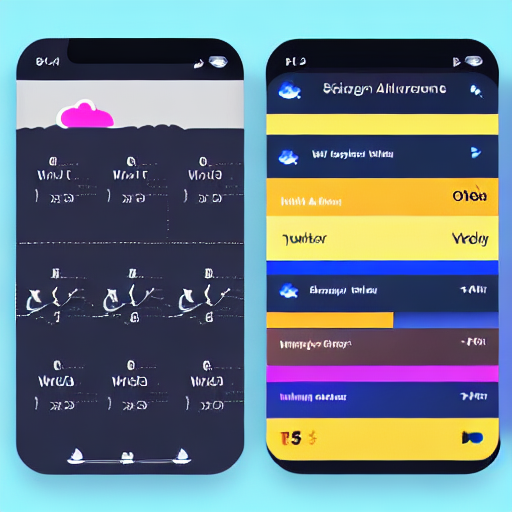

Image saved as 'generated_ui_design.png'
Enter a description for the mobile UI design (or type 'exit' to quit): exit
Exiting the application.


In [17]:
def main():
    """Main function to run the Mobile UI Design Generator."""
    print("Welcome to the Mobile UI Design Generator!")

    while True:
        # Get user input for the UI design description
        user_input = input("Enter a description for the mobile UI design (or type 'exit' to quit): ")

        # Exit the program if the user types 'exit'
        if user_input.lower() == 'exit':
            print("Exiting the application.")
            break

        # Generate and display the UI design based on user input
        generate_ui_design(user_input)

# Entry point of the program
if __name__ == "__main__":
    main()